# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, how='outer', on='Mouse ID')


# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count = mouse_study_df['Mouse ID'].nunique()
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_study_df.loc[mouse_study_df['Mouse ID'] == "g989", :]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_df[mouse_study_df['Mouse ID']. isin(duplicate_ID)==False]
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_clean = cleaned_df['Mouse ID'].nunique()
mice_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).mean()
median = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).median()
var = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).var()
std = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).std()
sem = cleaned_df['Tumor Volume (mm3)'].groupby(cleaned_df['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({"Mean Tumor Volume": mean,
                              "Median Tumor Volume": median,
                              "Tumor Volume Variance": var,
                              "Tumor Volume Std. Dev.": std,
                              "Tumor Volume Std. Err.": sem})
summary_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
summary_agg = cleaned_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

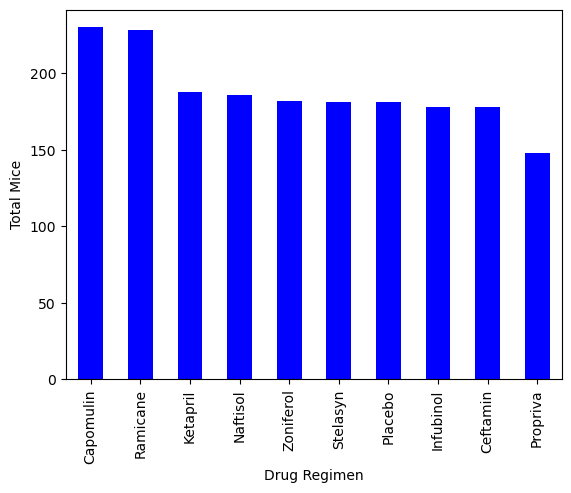

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_count = cleaned_df['Drug Regimen'].value_counts()
mice_count

# Generate bar plot for the study based on the 'Drug Regimen' and set the bar colors to blue
study_bar = mice_count.plot.bar(color='b')
# Add labels to the y and x axes
plt.ylabel("Total Mice")
plt.xlabel("Drug Regimen")
# Display the chart
plt.show()


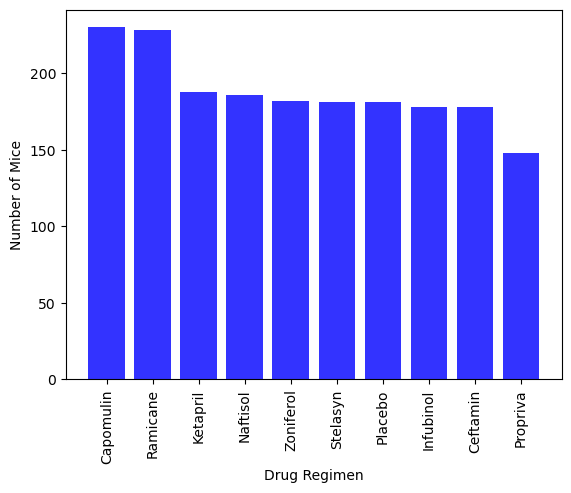

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

# Set formatting for chart using pyplot methods
plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')
plt.xticks(rotation="vertical")
# Add labels to the y and x axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
# Display the chart
plt.show()


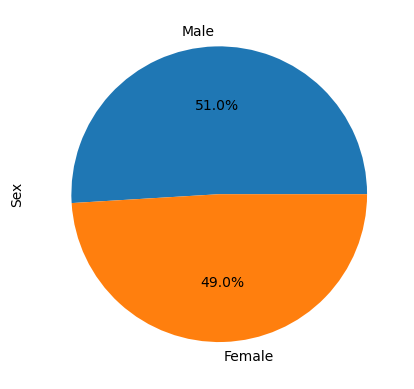

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution = cleaned_df['Sex'].value_counts()
# Build pie chart with pandas and display result as percent using autopercent
gender_distribution.plot.pie(autopct= "%1.1f%%")
plt.show()  


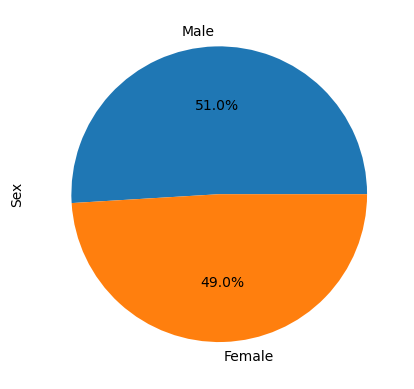

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Provide the data with labels for Male and Female mice
labels = ['Female', 'Male']
# Set up the chart using pyplot and apply percent format
plot = gender_distribution.plot.pie(y='Total Count', autopct="%1.1f%%")

plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleaned_df.groupby(['Mouse ID'])['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = max_tumor.merge(cleaned_df, on=['Mouse ID','Timepoint'],how="left")



In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatment=0
for drug in treatment_list:
    final_tumor_volume = merged_data.loc[merged_data['Drug Regimen']==drug,'Tumor Volume (mm3)']
    tumor_volume_list.append(final_tumor_volume)
    quartiles = final_tumor_volume.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    medianq = quartiles[0.5].round(2)
    lower_bound = round(lowerq - 1.5*iqr,2)
    upper_bound = round(upperq + 1.5*iqr,2)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    if treatment == 0:
        print(f"The lower quartile of {drug} treatments is {lowerq} while the upper quartile is {upperq}.")
        print(f"The interquartile range [IQR] of {drug} treatments is {iqr} with a median tumor volume of {medianq}.")
        treatment == +1
   
    outliers = final_tumor_volume.loc[(final_tumor_volume<lower_bound)|(final_tumor_volume>upper_bound)]

    # Determine outliers using upper and lower bounds
    if treatment == 0:
        print(f"------------------------------------------")
        print(f"{drug}'s potential outliers could be {outliers}.\n ")
        treatment == +1



The lower quartile of Capomulin treatments is 32.38 while the upper quartile is 40.16.
The interquartile range [IQR] of Capomulin treatments is 7.78 with a median tumor volume of 38.13.
------------------------------------------
Capomulin's potential outliers could be Series([], Name: Tumor Volume (mm3), dtype: float64).
 
The lower quartile of Ramicane treatments is 31.56 while the upper quartile is 40.66.
The interquartile range [IQR] of Ramicane treatments is 9.1 with a median tumor volume of 36.56.
------------------------------------------
Ramicane's potential outliers could be Series([], Name: Tumor Volume (mm3), dtype: float64).
 
The lower quartile of Infubinol treatments is 54.05 while the upper quartile is 65.53.
The interquartile range [IQR] of Infubinol treatments is 11.48 with a median tumor volume of 60.17.
------------------------------------------
Infubinol's potential outliers could be 31    36.321346
Name: Tumor Volume (mm3), dtype: float64.
 
The lower quartile of Ce

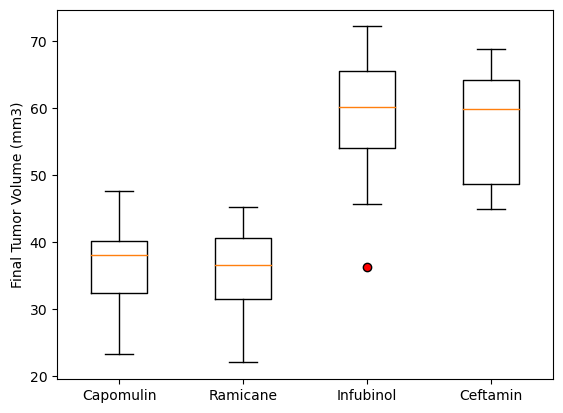

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.ylabel("Final Tumor Volume (mm3)")
plt.boxplot(tumor_volume_list, labels=treatment_list, showfliers=True, flierprops={'markerfacecolor': 'red'})
plt.show()


## Line and Scatter Plots

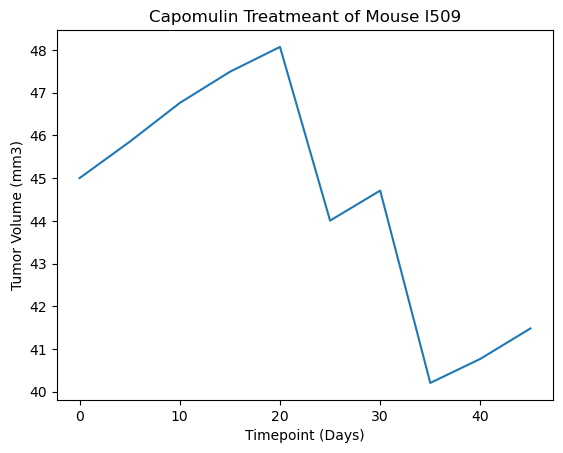

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"]
line_df = Capomulin_df.loc[Capomulin_df['Mouse ID'] == "l509"]
line_df.head()
x_axis = line_df['Timepoint']
tumor_size = line_df['Tumor Volume (mm3)']

plt.title('Capomulin Treatmeant of Mouse l509')
plt.plot(x_axis, tumor_size)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

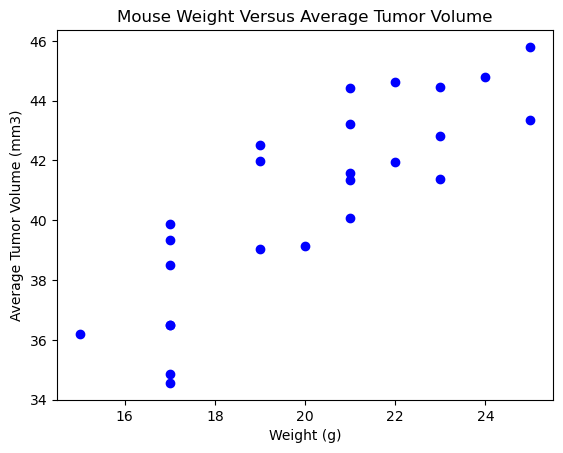

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_df = cleaned_df.loc[cleaned_df['Drug Regimen'] == "Capomulin"]
Capomulin_avg = Capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(Capomulin_avg['Weight (g)'], Capomulin_avg['Tumor Volume (mm3)'], color="blue")
plt.title('Mouse Weight Versus Average Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


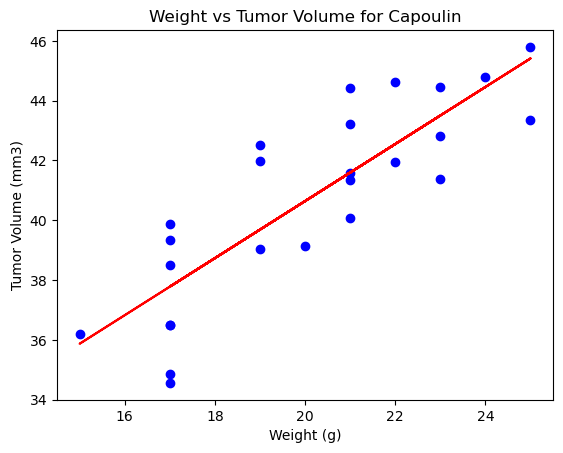

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope,intercept,rvalue, pvalue, stderr)= linregress(Capomulin_avg['Weight (g)'], Capomulin_avg['Tumor Volume (mm3)'])
regress_values=Capomulin_avg['Weight (g)']* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(Capomulin_avg['Weight (g)'],Capomulin_avg['Tumor Volume (mm3)'],color='b')
plt.plot(Capomulin_avg['Weight (g)'], regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capoulin")
plt.show() 
